In [1]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from dataclasses import dataclass
from glide_polar import GlidePolar
from maccready_math import calculate_speed_to_fly

In [2]:
glide_polar_high_b = GlidePolar(
    [ 32,      36,    42,     46,   50], # velocity kmh
    [ -1,   -1.05,  -1.4,  -1.75, -2.3]) # sink_rate

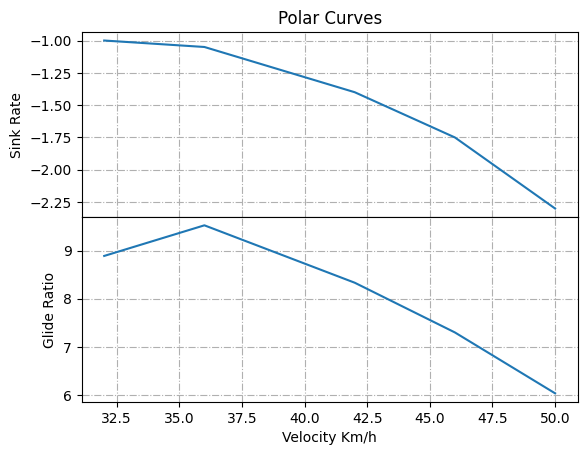

In [3]:
glide_polar_high_b.plot_polar()

In [6]:
thermals = [0.5, 1, 2, 3, 4]
wind_speeds_ms = [v/3.6 for v in range(-10, 25, 5)]
tft = calculate_speed_to_fly(glide_polar_high_b, thermals, wind_speeds_ms)

header_row = ["Wind Speed (kmh)"]
header_row += [f"MacCready {t}" for t in thermals]
t = PrettyTable(header_row)
for wind_speed in wind_speeds_ms:
    row = [int(wind_speed * 3.6)]
    for thermal_strength in thermals:
        row.append(GlidePolar.velocity_idx_to_speedbar(tft[thermal_strength][wind_speed]["speed_to_fly"]))
    t.add_row(row)
print("--- Optimized Speedbar usage for a High B ---")
print(t)


--- Optimized Speedbar usage for a High B ---
+------------------+---------------+-------------+-------------+-------------+-------------+
| Wind Speed (kmh) | MacCready 0.5 | MacCready 1 | MacCready 2 | MacCready 3 | MacCready 4 |
+------------------+---------------+-------------+-------------+-------------+-------------+
|       -10        |      Trim     |     Trim    |   1/3 Bar   |   1/3 Bar   |   2/3 Bar   |
|        -5        |      Trim     |     Trim    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |
|        0         |      Trim     |     Trim    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |
|        5         |      Trim     |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |   Full Bar  |
|        10        |    1/3 Bar    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |   Full Bar  |
|        15        |    1/3 Bar    |   2/3 Bar   |   2/3 Bar   |   Full Bar  |   Full Bar  |
|        20        |    1/3 Bar    |   2/3 Bar   |   Full Bar  |   Full Bar  |   Full Bar  |
+------------------+----